# HiMCM Session 7
# Other Prediction Methods

- **Multiple Linear Regression**: Predict the dependent variable based on a linear combination of independent variables.
- **Polynomial Regression**: Describe the relationship as a polynomial.
- **Logistic Regression**: Designed for classification tasks.

## Multiple Linear Regression

Multiple linear regression is an extension of linear regression. It aims to build a relationship between the dependent variable and multiple independent variables. We will use the following example to see how to conduct multiple linear regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The following "magic command" allows figures to be displayed automatically
%matplotlib inline

In [22]:
# Load the insurance prices data set.
# url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
# insurance = pd.read_csv(url)
filename='C:\\Users\\lzhao\\Dropbox (Personal)\\Teaching\\MathematicalModeling\\insurance.csv'
filename=r'C:\Users\lzhao\Dropbox (Personal)\Teaching\MathematicalModeling\insurance.csv'

insurance = pd.read_csv(filename, index_col=0)
insurance.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To get a feel for the data, it is common to do some quick exploratory analysis.

In [3]:
# Size of data
print(insurance.shape)

(1338, 7)


In [4]:
# Variable names, data types, and missing values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [5]:
# Distribution of categorical variables
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:>

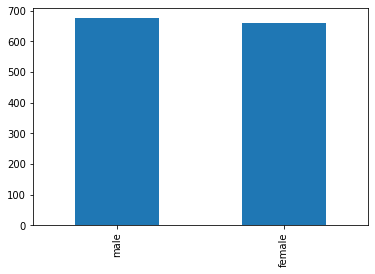

In [6]:
insurance['sex'].value_counts().plot.bar()

<AxesSubplot:>

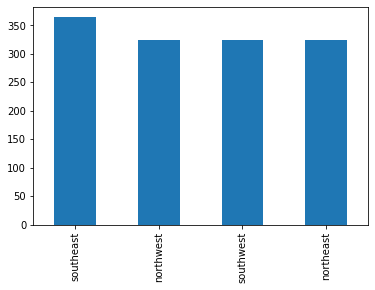

In [11]:
insurance['region'].value_counts().plot.bar()

<AxesSubplot:>

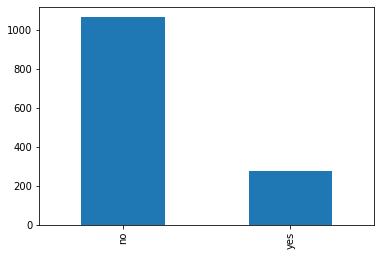

In [12]:
# Visualize the distribution of `smoker` and `region`.
insurance['smoker'].value_counts().plot.bar()




In [13]:
# Descriptive statistics on numerical variables
# BMI: body mass index
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


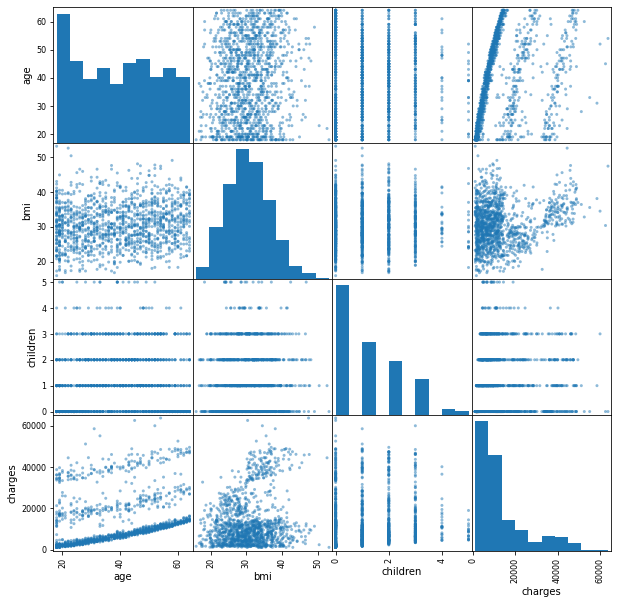

In [23]:
# Distribution of data
pd.plotting.scatter_matrix(insurance, figsize=(10, 10))
plt.show()

In [21]:
# What do the figures look like if there is an outlier?

# original = insurance.loc[0, 'charges']
# insurance.loc[0, 'charges'] = 1e6
# print(original)
# insurance.head()
# insurance['charges'].hist()
# plt.scatter(insurance['charges'], insurance['age'])


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,1000000.00000
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Which variable has a linear relationship with `charges`?

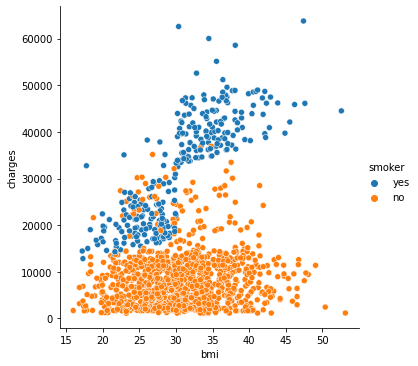

In [15]:
# Use relplot from the seaborn library to inspect the data more closely
import seaborn as sns
sns.relplot(x = "bmi", y="charges", hue ="smoker",data=insurance)
# plt.show()

In [ ]:
# Exercise: Use Seaborn to make a scatter plot with age on the x axis and
# charges on the y axis, colored by whether the person is a smoker.



Let's build a multiple linear regression model.

In [24]:
import statsmodels.formula.api as smf

model1 = smf.ols('charges ~ age + bmi + children', data = insurance).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.80e-37
Time:                        21:24:40   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- What is the equation of this linear model?
charges = -6916.2 + 240 * age + 332.1 * bmi + 542.9 * childern
- Is the R^2 value good?
R^2 is 0.12, it is very small. The predictions are not very clost to the true values.
- Could any of the coefficients be 0?
The p value for age, bmi, and children are all close to 0. This means that the coefficients are significantly different from 0.
- Are the residuals follow a normal distribution?
The distribution of residuals does not look like a normal distribution. It suggests that this linear relationship is not accurate.
- Are the predicted values close to the actual values?
No. It looks like that there are other important factors.

<AxesSubplot:>

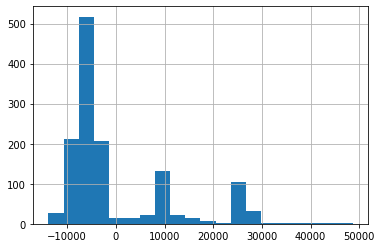

In [25]:
model1.resid.hist(bins = 20)

Text(0, 0.5, 'Predicted charges')

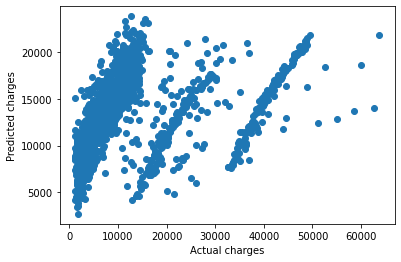

In [26]:
plt.scatter(x = insurance["charges"], y = model1.fittedvalues)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")

Let's add the remaining columns. For categorical variables, we need to convert them to quantitative data using **dummy variables**.

In [32]:
insurance_new = pd.get_dummies(insurance, columns=["sex"], drop_first=True)
insurance_new.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [33]:
# Exercise: Convert "smoker" and "region" to quantitative columns.
insurance_new = pd.get_dummies(insurance_new, columns=["smoker", 'region'],
                               drop_first=True)
insurance_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [36]:
# Exercise: Build a lienar regression model using all these columns.

model = smf.ols('charges ~ age + bmi + children + smoker_yes \
        + region_southeast + region_southwest',
                insurance_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:04:19   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
age                257.0064     11.889     21.617      0.000     233.683     280.330
bmi                338.6413     28.554     11.860      0.000     282.625     394.657
children           471.5441    137.656      3.426      0.001     201.498     741.590
smoker_yes        2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
region_southeast  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluate the performance of this linear model.

<AxesSubplot:>

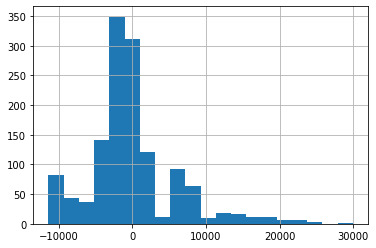

In [37]:
# Distribution of residuals
model.resid.hist(bins=20)

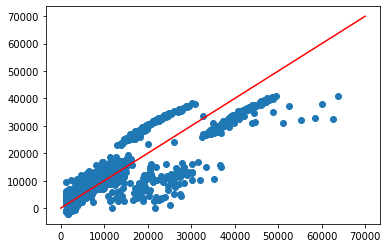

In [39]:
plt.scatter(insurance_new['charges'],
            model.fittedvalues)
plt.plot([0, 70000], [0, 70000], 'r')

## Polynomial Regression

If the relationship is not linear, we can use a polynomial to fit the data. A polynomial curve is more flexible since it has more parameters.

In [41]:
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv"
# wage = pd.read_csv(url)
# fname = "path + file name"
wage = pd.read_csv(url, usecols=['age', 'wage'])
wage.head()

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


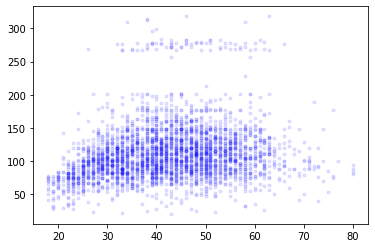

In [44]:
plt.plot(wage['age'], wage['wage'], 'b.', alpha=0.1)

In [51]:
35 ** 12

3379220508056640625

In [53]:
36 ** 12 - 35 ** 12

1359160830264976271

In [60]:
model = smf.ols('wage ~ age + I(age**2) + I(age**3) + I(age**4)', wage).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.77e-57
Time:                        22:55:26   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age            21.2455      5.887      3.609      0.000       9.703      32.788
I(age ** 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
I(age ** 3)     0.0068      0.003      2.221      0.026       0.001       0.013
I(age ** 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

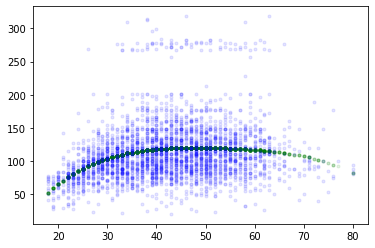

In [61]:
# Visualize the model
pred = model.fittedvalues
plt.plot(wage['age'], pred, 'g.', alpha=0.1)
plt.plot(wage['age'], wage['wage'], 'b.', alpha=0.1)

In [62]:
# Evalute the model on the test set.
from sklearn.model_selection import train_test_split
wage_train, wage_test = train_test_split(wage, test_size=0.33, random_state=42)

In [63]:
model2 = smf.ols('wage ~ age + I(age**2) + I(age**3) + I(age**4)', wage_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     46.17
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           3.70e-37
Time:                        22:55:28   Log-Likelihood:                -10277.
No. Observations:                2010   AIC:                         2.056e+04
Df Residuals:                    2005   BIC:                         2.059e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -152.2186     73.461     -2.072      0.038    -296.287      -8.150
age            17.7820      7.201      2.469      0.014       3.659      31.905
I(age ** 2)    -0.4301      0.252     -1.708      0.088      -0.924       0.064
I(age ** 3)     0.0046      0.004      1.242      0.214      -0.003       0.012
I(age ** 4) -1.959e-05   1.99e-05     -0.983      0.326   -5.87e-05    1.95e-05
==============================================================================
Omnibus:                      739.438   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3377.335
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       8.346   Cond. No.                     5.62e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

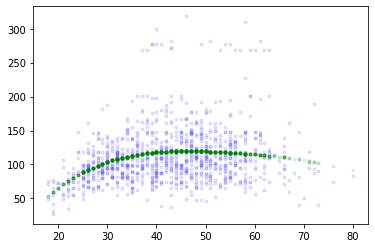

In [64]:
# predictions on the test set
pred = model2.predict(wage_test['age'])
plt.plot(wage_test['age'], wage_test['wage'], 'b.', alpha=0.1)
plt.plot(wage_test['age'], pred, 'g.', alpha=0.1)


## Logistic Regression

The Challenger Space Shuttle tragically explored in 1986, killing all astronauts on board. The explosion was shown to have been caused by an O-ring failure, likely due to cold temperatures the day of the launch.

<img src="https://www.history.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTU3ODc4NTk5MjI2NTY1OTYx/image-placeholder-title.jpg" width="300">

Below is the test data of this O-ring under a variety of temperatures:

In [65]:
url = "http://comet.lehman.cuny.edu/owen/teaching/mat328/chall.txt"
data = pd.read_csv(url,
                   sep="\s+",
                   header=None,
                   names=["Temperature", "Failure"])
# data.sort_values(by='Temperature', inplace=True)
# data.reset_index(drop=True, inplace=True)
data

,Temperature,Failure
0,66,0
1,70,1
2,69,0
3,68,0
4,67,0
5,72,0
6,73,0
7,70,0
8,57,1
9,63,1


<AxesSubplot:xlabel='Temperature', ylabel='Failure'>

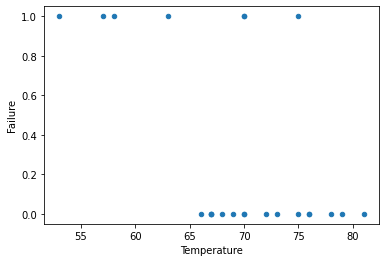

In [66]:
# Plot the data
data.plot.scatter(x="Temperature", y="Failure")

On the launch day, the temperature was 30 degree Fahrenheit. How likely will this O-ring fail?

A **logistic regression** model aims to predict the probability of a event given a group of independent variables. Let's apply this method.

In [67]:
logistic_model = smf.logit('Failure ~ Temperature',data).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.2813
Time:                        23:05:23   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322      0.108     -2.145      0.032      -0.444      -0.020
===============================================================================
"""

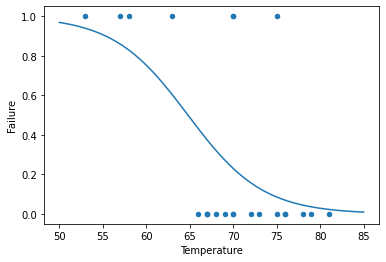

In [68]:
# Graph the model as a probability curve.
x = np.linspace(50, 85, 200) # sample 200 evenly-spaced values in [50, 85]
params = logistic_model.params
logits = params['Intercept'] + x * params['Temperature']
probs = np.exp(logits) / (1 + np.exp(logits))

data.plot.scatter(x = "Temperature", y = "Failure")
plt.plot(x, probs)


In [69]:
test = pd.DataFrame({"Temperature":[30]})
test

,Temperature
0,30


In [70]:
logistic_model.predict(test)

0    0.99969
dtype: float64